# mtcars

In this notebook, you'll explore the iconic `mtcars` dataset. Why mtcars? Because it is a classic pedagogical dataset and there is A LOT written about it online. Every complicated concept we encounter, you should be able to google the name plus `mtcars` and find some information about it. So for example, when we study linear regression, you'll be able to google "linear regression mtcars" and find a million billion tutorials that use this dataset to teach regressions. It will give us a common vocabulary with other learners around the world. 

### Standard Python and R imports

In [14]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [16]:
%%R

# My commonly used R imports

require('tidyverse')

## Load the data

In [17]:
%%R
 
# Import data with R
mtcars <- read_csv('mtcars.csv', show_col_types = FALSE)
mtcars %>% head(4)

# A tibble: 4 × 12
  name           mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
  <chr>        <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1 Mazda RX4     21       6   160   110  3.9   2.62  16.5     0     1     4     4
2 Mazda RX4 W…  21       6   160   110  3.9   2.88  17.0     0     1     4     4
3 Datsun 710    22.8     4   108    93  3.85  2.32  18.6     1     1     4     1
4 Hornet 4 Dr…  21.4     6   258   110  3.08  3.22  19.4     1     0     3     1


In [18]:
# Import data in python
mtcars = pd.read_csv('mtcars.csv')
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


# Exploratory data analysis

## Summary statistics

In this dataset we have some continuous variables (like `mpg`, `disp`, `hp`, `drat`, `wt`, and `qsec`) and some discrete variables (like `vs`, `am`, `gear`, and `carb`). Let's start with some summary statistics. 



In [ ]:
%%R 

continuous_variables <- c('mpg', 'disp', 'hp', 'drat', 'wt', 'qsec')
# 👉 Select the continuous variables only and get summary statistics
# including, mean, median, min, max, and stdev for every column

mtcars |>
    select(c(continuous_variables)) |>
    summary()

      mpg             disp             hp             drat      
 Min.   :10.40   Min.   : 71.1   Min.   : 52.0   Min.   :2.760  
 1st Qu.:15.43   1st Qu.:120.8   1st Qu.: 96.5   1st Qu.:3.080  
 Median :19.20   Median :196.3   Median :123.0   Median :3.695  


 Mean   :20.09   Mean   :230.7   Mean   :146.7   Mean   :3.597  
 3rd Qu.:22.80   3rd Qu.:326.0   3rd Qu.:180.0   3rd Qu.:3.920  
 Max.   :33.90   Max.   :472.0   Max.   :335.0   Max.   :4.930  
       wt             qsec      
 Min.   :1.513   Min.   :14.50  
 1st Qu.:2.581   1st Qu.:16.89  
 Median :3.325   Median :17.71  
 Mean   :3.217   Mean   :17.85  
 3rd Qu.:3.610   3rd Qu.:18.90  
 Max.   :5.424   Max.   :22.90  


In [ ]:
%%R

## To get stdev

test <- mtcars |>
    select(c(continuous_variables)) |>
    summarize(
        sd_mpg = sd(mpg),
        sd_disp = sd(disp),
        sd_hp = sd(hp),
        sd_drat = sd(drat),
        sd_wt = sd(wt),
        sd_qsec = sd(qsec)
    )

test

# A tibble: 1 × 6


  sd_mpg sd_disp sd_hp sd_drat sd_wt sd_qsec
   <dbl>   <dbl> <dbl>   <dbl> <dbl>   <dbl>
1   6.03    124.  68.6   0.535 0.978    1.79


In [42]:
%%R

discrete_variables <- c('vs', 'am', 'gear', 'carb')
# 👉 Select the discrete variables only and make a pivot table for each
# so we know how many cars there are in each category (for example, how many automatic vs manual)?

mtcars |>
    select(name, c(discrete_variables)) |>
    group_by(am) |>
    summarize(
        count = n()
    )

# A tibble: 2 × 2
     am count
  <dbl> <int>
1     0    19
2     1    13


In [51]:
%%R

mtcars |>
    select(name, c(discrete_variables)) |>
    group_by(vs) |>
    summarize(
        count = n()
    )

# A tibble: 2 × 2


     vs count
  <dbl> <int>
1     0    18
2     1    14


In [52]:
%%R

mtcars |>
    select(name, c(discrete_variables)) |>
    group_by(gear) |>
    summarize(
        count = n()
    )

# A tibble: 3 × 2
   gear count
  <dbl> <int>
1     3    15
2     4    12
3     5     5


In [53]:
%%R

mtcars |>
    select(name, c(discrete_variables)) |>
    group_by(carb) |>
    summarize(
        count = n()
    )

# A tibble: 6 × 2
   carb count
  <dbl> <int>
1     1     7
2     2    10
3     3     3
4     4    10
5     6     1
6     8     1


## 1-D visualizations (aka distributions)


### Continus variables

For each continuous variable, use ggplot to make a plot of the distribution. You can use histograms, dot plots, box plots, beeswarms, etc...(whichever chart type you found most useful). Learn about that variable and give each chart a headline that explains what you're seeing. You may have to google to learn what that column is. The chart should show the min, max, and median of the variable. For example, if you do a histogram, you might put a vertical line through the median. If you do a dot-plot, annotate the median some other way. (boxplots show it by default).


`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


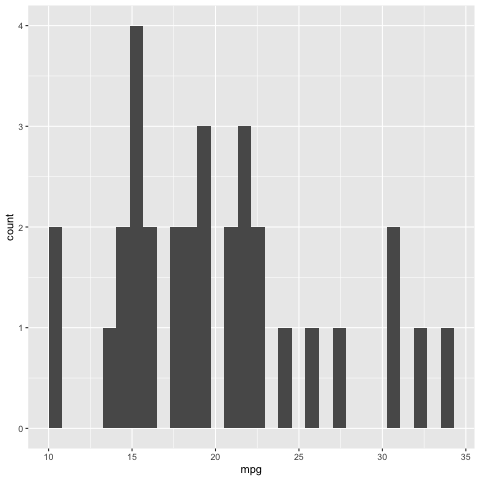

In [56]:
%%R 

# 👉 chart for mpg

mtcars |>
    ggplot() +
    aes(x=mpg) +
    geom_histogram()

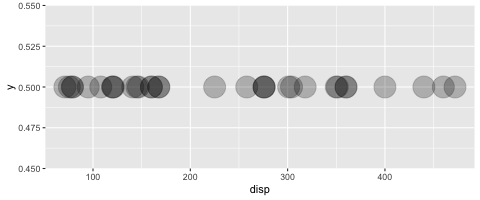

In [75]:
%%R -h 200

# 👉 chart for disp

# install.packages("ggbeeswarm")
# library(ggbeeswarm)


mtcars |>
    ggplot() +
    aes(x=disp, y=0.5) +
    geom_point(alpha=0.25, size=10)

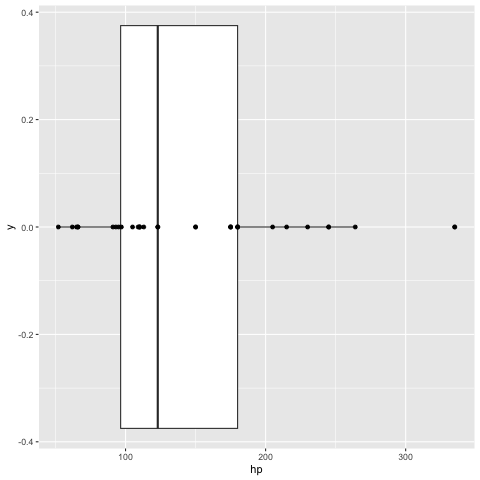

In [ ]:
%%R 

# 👉 chart for hp

mtcars |>
    ggplot() +
    geom_boxplot(aes(x=hp)) +
    geom_point(aes(x=hp, y=0))

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


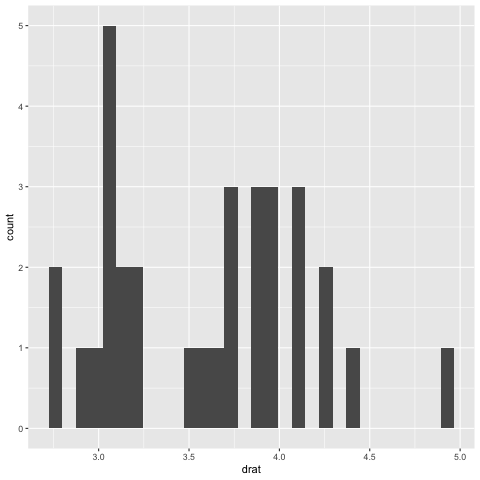

In [81]:
%%R 

# 👉 chart for drat

mtcars |>
    ggplot() +
    aes(x=drat) +
    geom_histogram()

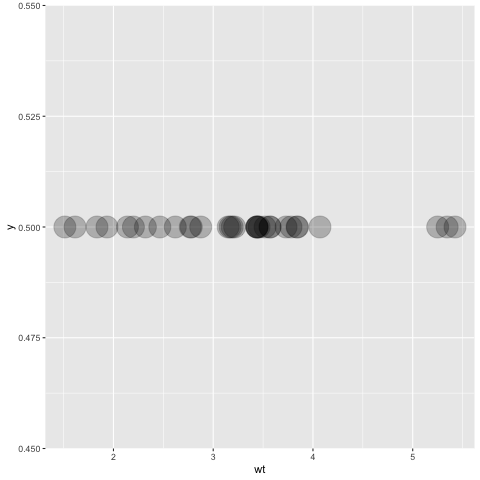

In [82]:
%%R 

# 👉 chart for wt

mtcars |>
    ggplot() +
    aes(x=wt, y=0.5) +
    geom_point(alpha=0.25, size=10)

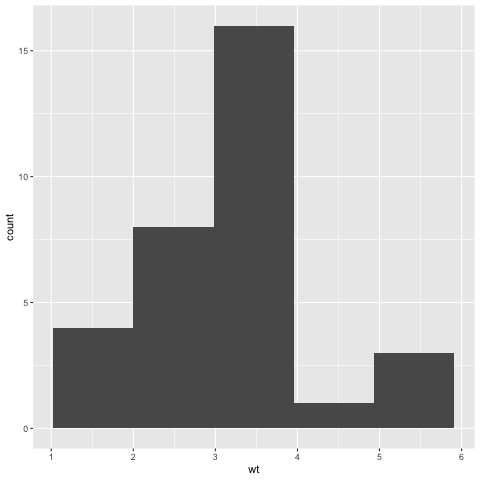

In [85]:
%%R

mtcars |>
    ggplot() +
    aes(x=wt) +
    geom_histogram(bins=5)

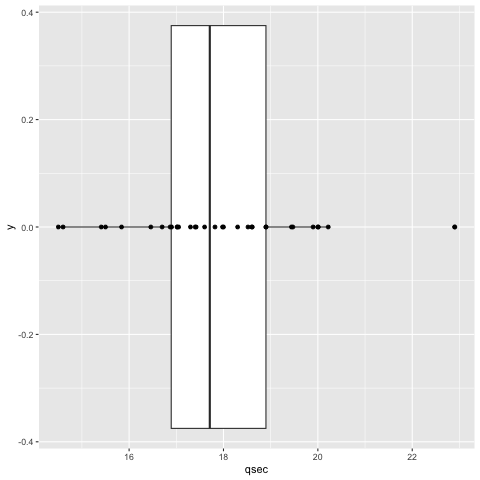

In [88]:
%%R 

# 👉 chart for qsec

mtcars |>
    ggplot() +
    geom_boxplot(aes(x=qsec)) +
    geom_point(aes(x=qsec, y=0))

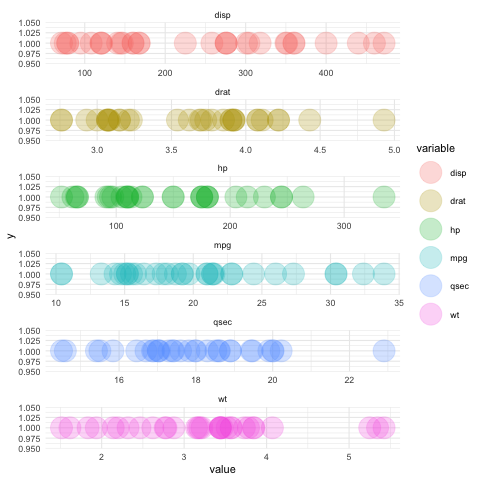

In [102]:
%%R

continuous_variables <- c('mpg', 'disp', 'hp', 'drat', 'wt', 'qsec')

mtcars |>
    select(name, c(continuous_variables)) |>
    pivot_longer(-name,
                names_to="variable",
                values_to = "value") |>
    ggplot() +
    aes(x=value, y=1, color=variable) +
    geom_point(alpha=0.25, size=10) +
    facet_wrap(~variable, scales="free_x", ncol=1) +
    theme_minimal()


Bonus: Write the ggplot code to reproduce the chart below


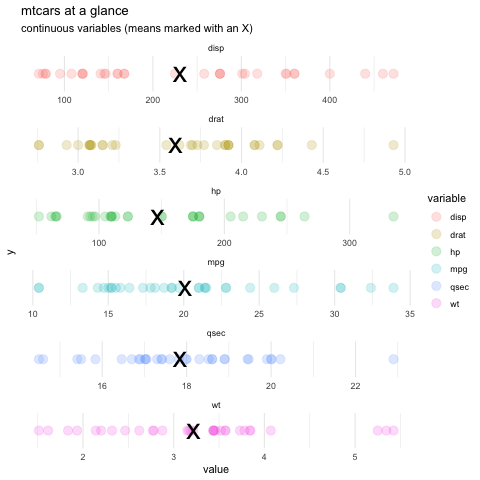

### Discrete Variables

Take the `mtcars` dataframe, `select` only the discrete variables, the use `pivot_longer` to pivot it from wide to long. Finally, use ggplot to make a column chart from the long dataframe that is faceted by the discrete variable. So you should end up with one chart, with subplots for each facet, like this:

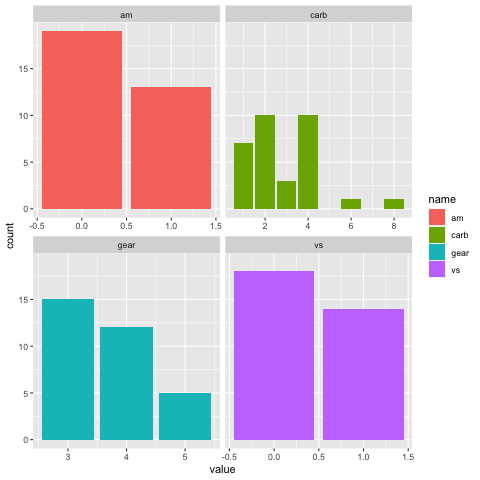

In [ ]:
%%R 

discrete_variables <- c('vs', 'am', 'gear', 'carb')

# 👉 Write code to reproduce the chart above in this cell and give the chart a title
# 👉 write four sentences below, one per subplot (thsee are just obesrvations)

## AM: We know that there are 6 more automatic vehicles in the dataset than manual vehicles.
## CARB: The distrobution of carborators looks bimodal around 2 and 4 and is right skewed.
## GEAR: The distrobution of gears seems to be exponentially distributed.
## VS: There seem to be more v-shaped engines than straight line engines (about 18 v-shaped to 14 straight line).

👉 Run the cell below, observe the chart it creates. Then comment the code to demonstrate you understand what it does. Replace every `#add comment here` with a comment explaining what that part of the code does. If you're not sure, talk to ChatGPT about it.

In [103]:
%%R 

# plot only discrete variables
to_plot <- mtcars_long %>% filter(variable %in% discrete_variables)

plot_discrete <- ggplot(to_plot) +
    aes(y=value, fill=variable) +
    geom_bar() +
    facet_wrap(~variable, scales='free') +
    theme_minimal() +
    labs(title = 'mtcars at a glance', subtitle='discrete variables')


plot_discrete

Error in (function (expr, envir = parent.frame(), enclos = if (is.list(envir) ||  : 
  object 'mtcars_long' not found


RInterpreterError: Failed to parse and evaluate line "\n# plot only discrete variables\nto_plot <- mtcars_long %>% filter(variable %in% discrete_variables)\n\nplot_discrete <- ggplot(to_plot) +\n    aes(y=value, fill=variable) +\n    geom_bar() +\n    facet_wrap(~variable, scales='free') +\n    theme_minimal() +\n    labs(title = 'mtcars at a glance', subtitle='discrete variables')\n\n\nplot_discrete\n".
R error message: "Error in (function (expr, envir = parent.frame(), enclos = if (is.list(envir) ||  : \n  object 'mtcars_long' not found"

## Visual Choices Questions

👉 What is a discrete variable vs a continuous variable?

👉 Why did I chose a bar chart for the discrete variables and distributions for the continuous variables?

In [ ]:
# A continuous variable cna fall anywhere on a given spectrum, whereas a discrete variable can only fall at certain points on a spectrum.
# Continuous variables necessarily fall along a numeric spectrum, whereas discrete variables are best displayed by grouping and counting their occurences.

👉 What can you tell me about these cars after looking at the charts above?

In [ ]:
# 

👉 What further questions about this data do you have now? 

In [ ]:
# answer here